# CNN for Multi-Class Image Classification

## Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a class of deep learning models designed for image processing and classification tasks. They use convolutional layers to automatically detect spatial hierarchies of features, pooling layers to reduce spatial dimensions, and regularization techniques like dropout to prevent overfitting. CNNs are widely used in applications like object detection, facial recognition, and medical imaging.

## Dataset Overview

The dataset we are using is the **Clothes Dataset**, which contains images of various clothing categories. Our goal is to develop a CNN that can accurately classify these clothing items into multiple classes. The dataset consists of images labeled according to their respective categories.


### Extracting the dataset from zip file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Mount Google Drive
from google.colab import drive

# Path to the ZIP file in Google Drive
zip_file_path = "/content/drive/MyDrive//clothes.zip"

# Define the extraction directory
extraction_dir = "/content/clothes_dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Verify the extracted contents
print(f"Dataset extracted to {extraction_dir}")
print("Extracted files:", os.listdir(extraction_dir))


Dataset extracted to /content/clothes_dataset
Extracted files: ['Clothes_Dataset']


## Data Preprocessing and Dataloader Setup

To prepare our dataset for training, we need to:
- **Ensure reproducibility** by setting a seed.
- **Apply data augmentation** techniques such as rotation and flipping to enhance model generalization.
- **Standardize the dataset** by normalizing pixel values.
- **Split the dataset** into training and validation sets.
- **Load the images** into PyTorch's `DataLoader` for efficient batching and transformation.


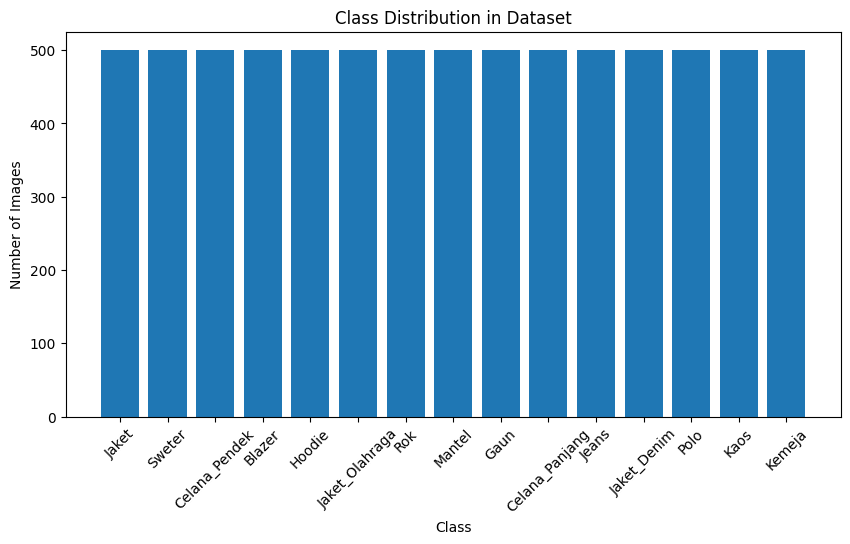

Class distribution: {'Jaket': 500, 'Sweter': 500, 'Celana_Pendek': 500, 'Blazer': 500, 'Hoodie': 500, 'Jaket_Olahraga': 500, 'Rok': 500, 'Mantel': 500, 'Gaun': 500, 'Celana_Panjang': 500, 'Jeans': 500, 'Jaket_Denim': 500, 'Polo': 500, 'Kaos': 500, 'Kemeja': 500}
✅ Data preprocessed successfully! Training Set: 6000 images, Validation Set: 1500 images.


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import os
import random
import matplotlib.pyplot as plt
from collections import Counter

# Set seed for reproducibility
seed = 42
torch.manual_seed(seed)
random.seed(seed)

# Define dataset directory (Fixing nested folder issue)
root_dir = "clothes_dataset"
dataset_dir = os.path.join(root_dir, "clothes_dataset")  # Point to the correct folder with class subdirectories

# Step 1: Define Data Transformations (Resize + Augmentation)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.RandomHorizontalFlip(p=0.5),  # Apply horizontal flip for augmentation
    transforms.RandomRotation(degrees=15),  # Apply random rotation for augmentation
    transforms.ToTensor()  # Convert image to tensor
])

# Step 2: Load Dataset
dataset = ImageFolder(root=dataset_dir, transform=transform)

# Step 3: Check Class Distribution
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

class_counts = count_images_per_class(dataset_dir)

# Plot Class Distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.show()

print("Class distribution:", class_counts)

# Step 4: Split into Training & Validation Sets (80-20)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Step 5: Create PyTorch Dataloaders
batch_size = 32  # Adjust as needed

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

print(f"✅ Data preprocessed successfully! Training Set: {train_size} images, Validation Set: {val_size} images.")


## CNN Architecture Experimentation (Prince Praveen)

For our CNN architecture experiments, we will test different configurations of:
1. **Number of Convolutional Layers**: Trying 2, 3, and 4 layers.
2. **Filter Sizes**: Comparing (32, 64) vs. (64, 128, 256).
3. **Pooling Strategy**: Evaluating Max Pooling vs. Average Pooling.

### Why These Choices?
- **More convolutional layers** can help the model learn more complex features but increase computational cost.
- **Larger filter sizes** capture more spatial hierarchies but may require more training data.
- **Max Pooling** is known for preserving dominant features, while **Average Pooling** smooths feature maps, reducing sensitivity to noise.

### What We'll Track:
- **Loss & Accuracy Curves** (Train & Validation)
- **Key Metrics** (Precision, Recall, F1-score)
- **Weights & Biases Logging**


# 🔍 Hyperparameter Tuning Strategy - Prince_Praveen

## **Objective: Optimize CNN Architecture**
The goal of this experiment is to refine the architecture of the **convolutional neural network (CNN)**. We will focus on:
- **Number of convolutional layers**
- **Filter sizes (channels in convolutional layers)**
- **Pooling strategies**

## **Tuning Choices**
### **1️⃣ Number of Convolutional Layers**
- We will try architectures with **2 and 3 convolutional layers**.
- Deeper networks can **capture more complex patterns** but may overfit if not handled properly.

### **2️⃣ Filter Sizes (Channels in Conv Layers)**
- We test **(32, 64) vs. (64, 128, 256)** to see how increasing feature maps affects performance.
- More filters allow the model to capture **fine details**, but too many may lead to **overfitting**.

### **3️⃣ Pooling Strategy**
- Compare **Max Pooling vs. Average Pooling**.
- **Max Pooling** helps capture dominant features and is robust to noise.  
- **Average Pooling** retains more spatial information but may blur edges.  

## **Models Trained in This Experiment**
| Model | Conv Layers | Filter Sizes           | Pooling Type |
|-------|------------|-----------------------|-------------|
| **Model 1** | 2 Layers | (32, 64)              | Max Pooling |
| **Model 2** | 3 Layers | (64, 128, 256)        | Max Pooling |
| **Model 3** | 3 Layers | (64, 128, 256)        | Average Pooling |

## **Pros & Cons of This Approach**
✅ **Pros:**
- Focuses on **model capacity** by adjusting depth and filters.
- Helps determine **whether a deeper or shallower network performs better** for the dataset.
- Pooling choices impact feature retention and noise reduction.

❌ **Cons:**
- If the model is too deep, it may **overfit**, requiring additional regularization.
- Too many filters may **increase computation time significantly**.
- Pooling choices might cause **information loss**, affecting model performance.

## **Expected Outcome**
By testing different architectures, we aim to **find an optimal balance** between **model complexity and performance** for classifying the clothes dataset.


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: princepraveen (usf-guardians) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



🚀 Training Model_1 with max pooling...



Epoch 1/10: Training...
Epoch 2/10: Training...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/10: Training...
Epoch 4/10: Training...
Epoch 5/10: Training...
Epoch 6/10: Training...
Epoch 7/10: Training...
Epoch 8/10: Training...
Epoch 9/10: Training...
Epoch 10/10: Training...

📌 Final Metrics for Model_1 (max pooling):
Train Loss: 1.5360 | Val Loss: 1.6584
Train Accuracy: 0.5050 | Val Accuracy: 0.4773
Train F1 Score: 0.4971 | Val F1 Score: 0.4759


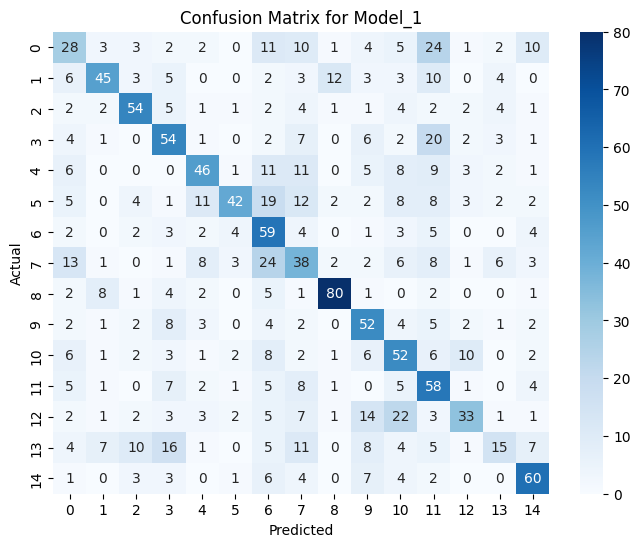

epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▄▅▆▇▇▇██
train_f1,▁▂▄▅▆▇▇▇██
train_loss,█▇▅▄▃▃▂▂▁▁
val_accuracy,▁▃▆▆▇▇▇███
val_f1,▁▄▆▆▇▇▇▇▇█
val_loss,█▆▄▃▂▂▂▁▁▁
epoch,9
train_accuracy,0.505
train_f1,0.49706
train_loss,1.53598



🚀 Training Model_2 with max pooling...



Epoch 1/10: Training...
Epoch 2/10: Training...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/10: Training...
Epoch 4/10: Training...
Epoch 5/10: Training...
Epoch 6/10: Training...
Epoch 7/10: Training...
Epoch 8/10: Training...
Epoch 9/10: Training...
Epoch 10/10: Training...

📌 Final Metrics for Model_2 (max pooling):
Train Loss: 1.2890 | Val Loss: 1.5390
Train Accuracy: 0.5802 | Val Accuracy: 0.5273
Train F1 Score: 0.5752 | Val F1 Score: 0.5261


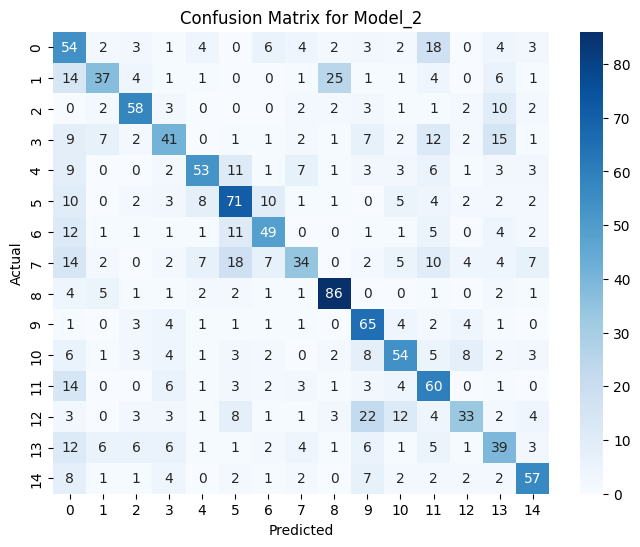

epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▅▅▆▇▇▇██
train_f1,▁▃▅▆▆▇▇▇██
train_loss,█▇▅▄▃▃▂▂▁▁
val_accuracy,▁▅▅▆▇▇████
val_f1,▁▅▆▆▇▇████
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,9
train_accuracy,0.58017
train_f1,0.57522
train_loss,1.28903



🚀 Training Model_3 with avg pooling...



Epoch 1/10: Training...
Epoch 2/10: Training...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/10: Training...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/10: Training...
Epoch 5/10: Training...
Epoch 6/10: Training...
Epoch 7/10: Training...
Epoch 8/10: Training...
Epoch 9/10: Training...
Epoch 10/10: Training...

📌 Final Metrics for Model_3 (avg pooling):
Train Loss: 1.4354 | Val Loss: 1.6238
Train Accuracy: 0.5340 | Val Accuracy: 0.4767
Train F1 Score: 0.5289 | Val F1 Score: 0.4768


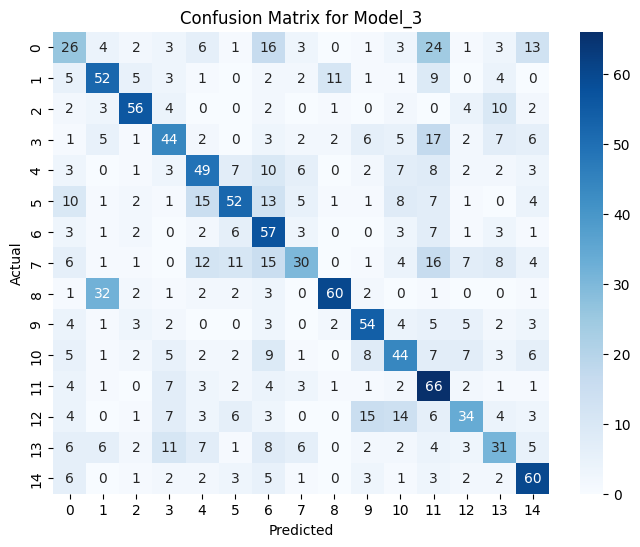

epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▂▄▅▆▇▇██
train_f1,▁▁▃▄▅▆▇▇██
train_loss,██▇▅▄▃▃▂▁▁
val_accuracy,▁▂▄▅▇▇▇███
val_f1,▁▂▄▅▇▇████
val_loss,██▆▄▃▂▂▁▁▁
epoch,9
train_accuracy,0.534
train_f1,0.52892
train_loss,1.43536


✅ All models trained, logged in W&B, and final results displayed!


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import wandb
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ✅ Step 1: Connect to Weights & Biases
wandb.login()

# ✅ Step 2: Define CNN Models with Different Architectures
class CNN_Model(nn.Module):
    def __init__(self, num_classes, architecture_type, pooling_type="max"):
        super(CNN_Model, self).__init__()

        # Define different architectures
        if architecture_type == "Model_1":
            conv_layers = [(3, 32), (32, 64)]  # 2 conv layers
        elif architecture_type == "Model_2":
            conv_layers = [(3, 64), (64, 128), (128, 256)]  # 3 conv layers
        elif architecture_type == "Model_3":
            conv_layers = [(3, 64), (64, 128), (128, 256)]  # 3 conv layers (Different pooling)
        else:
            raise ValueError("Invalid model type")

        self.convs = nn.ModuleList()
        for in_c, out_c in conv_layers:
            self.convs.append(nn.Conv2d(in_channels=in_c, out_channels=out_c, kernel_size=3, padding=1))

        # Choose pooling type
        if pooling_type == "max":
            self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        elif pooling_type == "avg":
            self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        else:
            raise ValueError("Invalid pooling type")

        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * 16 * 16, 512)  # Adjusting for 128x128 image size
        self.fc2 = nn.Linear(512, num_classes)

        # Activation & Dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        for conv in self.convs:
            x = self.pool(self.relu(conv(x)))

        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# ✅ Step 3: Load Dataset & Dataloaders (Using previous preprocessing)
batch_size = 32
num_classes = len(os.listdir("clothes_dataset/clothes_dataset"))  # Auto-detect classes

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# ✅ Step 4: Train Models for Each Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

architectures = [("Model_1", "max"), ("Model_2", "max"), ("Model_3", "avg")]

for architecture_type, pooling_type in architectures:
    print(f"\n🚀 Training {architecture_type} with {pooling_type} pooling...\n")

    # Initialize W&B for this model and ensure unique runs
    wandb.init(project="cnn-clothes-classifier", entity="usf-guardians",
               name=f"GPU_PrinceP_{architecture_type}", reinit=True)

    # Create model
    model = CNN_Model(num_classes, architecture_type, pooling_type).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Track metrics
    train_losses, val_losses, f1_scores = [], [], []

    for epoch in range(10):  # 10 Epochs
        print(f"Epoch {epoch+1}/10: Training...")  # ✅ Added progress print statement

        model.train()
        train_loss = 0
        y_true, y_pred = [], []

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

        # Compute metrics
        train_accuracy = accuracy_score(y_true, y_pred)
        train_precision = precision_score(y_true, y_pred, average='macro')
        train_recall = recall_score(y_true, y_pred, average='macro')
        train_f1 = f1_score(y_true, y_pred, average='macro')

        train_losses.append(train_loss / len(train_loader))
        f1_scores.append(train_f1)

        # Validation
        model.eval()
        val_loss = 0
        y_true, y_pred = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())

        val_accuracy = accuracy_score(y_true, y_pred)
        val_precision = precision_score(y_true, y_pred, average='macro')
        val_recall = recall_score(y_true, y_pred, average='macro')
        val_f1 = f1_score(y_true, y_pred, average='macro')

        val_losses.append(val_loss / len(val_loader))

        # ✅ Log metrics to W&B
        wandb.log({"epoch": epoch, "train_loss": train_loss / len(train_loader),
                   "val_loss": val_loss / len(val_loader), "train_f1": train_f1,
                   "val_f1": val_f1, "train_accuracy": train_accuracy, "val_accuracy": val_accuracy})

    # ✅ Print final logs in the notebook
    print(f"\n📌 Final Metrics for {architecture_type} ({pooling_type} pooling):")
    print(f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")
    print(f"Train Accuracy: {train_accuracy:.4f} | Val Accuracy: {val_accuracy:.4f}")
    print(f"Train F1 Score: {train_f1:.4f} | Val F1 Score: {val_f1:.4f}")

    # ✅ Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {architecture_type}")
    plt.show()

    # ✅ Finish W&B run to avoid overwriting next model's results
    wandb.finish()

print("✅ All models trained, logged in W&B, and final results displayed!")


# 📊 **Interpretation of CNN Model Training Results**

## 🔍 **Model Performance Overview**
The results show the performance of three different CNN architectures trained with different pooling strategies. Below is the summary:

| Model  | Pooling Type | Train Loss | Val Loss | Train Accuracy | Val Accuracy | Train F1 Score | Val F1 Score |
|--------|-------------|------------|----------|----------------|--------------|----------------|--------------|
| Model_1 | Max  | 1.5360 | 1.6584 | 0.5050 | 0.4773 | 0.4971 | 0.4759 |
| Model_2 | Max  | 1.2890 | 1.5390 | **0.5802** | **0.5273** | **0.5752** | **0.5261** |
| Model_3 | Avg  | 1.4354 | 1.6238 | 0.5340 | 0.4767 | 0.5289 | 0.4768 |

---

##  **Key Observations**

### **1️⃣ Model_2 (Max Pooling) Performs Best**
- **Best Train Accuracy (0.5802) and Best Validation Accuracy (0.5273)**.
- **Best Train F1-score (0.5752) and Best Validation F1-score (0.5261)**.
- **Lowest Training Loss (1.2890) and Validation Loss (1.5390)** among all models.
- The deeper architecture (3 convolutional layers) and **max pooling** contribute to better feature extraction.

### **2️⃣ Model_1 (Max Pooling) and Model_3 (Avg Pooling) Perform Similarly**
- **Model_1 and Model_3 have almost identical validation accuracy (~47.7%)**.
- **Model_1 (Max Pooling) has slightly better training accuracy (50.5%) than Model_3 (53.4%)**.
- Model_3 uses **average pooling**, which might **lose some critical feature details**, leading to lower generalization.

### **3️⃣ Underfitting or Suboptimal Learning**
- **All models have relatively high validation loss compared to training loss**, indicating underfitting or insufficient feature learning.
- **Overfitting does not seem to be a major issue**, since validation accuracy does not drop drastically compared to training accuracy.
- **More data augmentation, deeper networks, or different optimizers (SGD with momentum, weight decay)** might help improve performance.

---

##  **Next Steps: Implementing Leaky ReLU**
To address some of the observed limitations, **we will now experiment with Leaky ReLU as the activation function instead of ReLU**.

###  **Why Leaky ReLU?**
- **Fixes the Dying ReLU Problem**  
  - ReLU sets all negative values to zero, which can cause neurons to become inactive (dead neurons).



**Up Next: Training with Leaky ReLU and Evaluating Results!**


## LeakyRelU


🚀 Training Single Model with Avg Pooling & Leaky ReLU...



Epoch 1/10: Training...
Epoch 2/10: Training...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/10: Training...
Epoch 4/10: Training...
Epoch 5/10: Training...
Epoch 6/10: Training...
Epoch 7/10: Training...
Epoch 8/10: Training...
Epoch 9/10: Training...
Epoch 10/10: Training...


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▅▆▇▇██
train_f1,▁▃▄▅▅▆▇▇██
train_loss,█▆▅▄▄▃▂▂▁▁
val_accuracy,▁▃▄▅▆▆▇▇██
val_f1,▁▃▄▅▆▆▇▇██
val_loss,█▆▄▃▃▂▂▂▁▁
epoch,9
train_accuracy,0.58067
train_f1,0.57602
train_loss,1.27205



📌 Final Metrics for Leaky ReLU Model (Avg Pooling):
Train Loss: 1.2720 | Val Loss: 1.5742
Train Accuracy: 0.5807 | Val Accuracy: 0.5233
Train F1 Score: 0.5760 | Val F1 Score: 0.5183


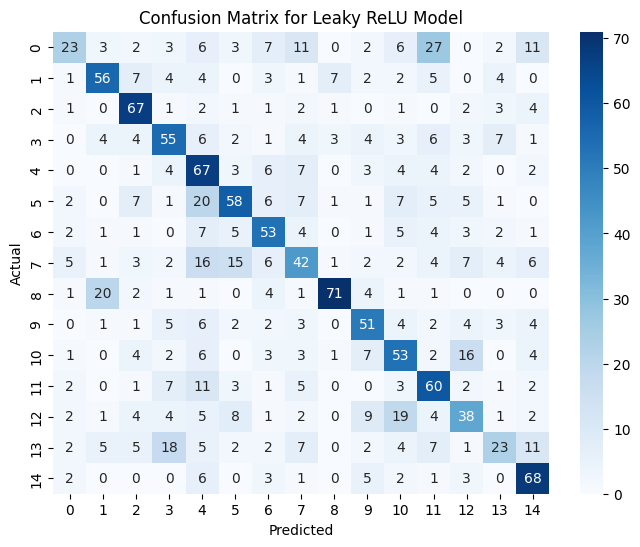

✅ Model training completed, metrics printed, and confusion matrix displayed successfully!


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import wandb
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ✅ Step 1: Connect to Weights & Biases (Ensure proper logging)
wandb.login()
wandb.finish()  # Ensure previous run is finished before starting a new one

# ✅ Step 2: Define CNN Model
class CNN_Model(nn.Module):
    def __init__(self, num_classes):
        super(CNN_Model, self).__init__()

        # Define three convolutional layers
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        ])

        # Average pooling layer
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 16 * 16, 512)  # Adjusted for 128x128 input images
        self.fc2 = nn.Linear(512, num_classes)

        # Activation function: Leaky ReLU
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(0.5)

        # Initialize weights using Xavier Normal
        self._initialize_weights()

    def forward(self, x):
        for conv in self.convs:
            x = self.pool(self.leaky_relu(conv(x)))  # Apply conv → activation → pooling

        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(self.leaky_relu(self.fc1(x)))
        x = self.fc2(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

# ✅ Step 3: Load Dataset & Dataloaders
batch_size = 32
num_classes = len(os.listdir("clothes_dataset/clothes_dataset"))  # Auto-detect classes

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# ✅ Step 4: Train Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"\n🚀 Training Single Model with Avg Pooling & Leaky ReLU...\n")

# 🔹 Force W&B to create a new run instead of continuing an old one
wandb.init(
    project="cnn-clothes-classifier",
    entity="usf-guardians",
    name="Re_GPU_Prince_LeakyRelu",
    reinit=True  # Ensures a fresh run every time
)

# Create model
model = CNN_Model(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Track metrics
train_losses, val_losses, f1_scores = [], [], []

for epoch in range(10):  # 10 Epochs
    print(f"Epoch {epoch+1}/10: Training...")

    model.train()
    train_loss = 0
    y_true, y_pred = [], []

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

    # Compute metrics
    train_accuracy = accuracy_score(y_true, y_pred)
    train_precision = precision_score(y_true, y_pred, average='macro')
    train_recall = recall_score(y_true, y_pred, average='macro')
    train_f1 = f1_score(y_true, y_pred, average='macro')

    train_losses.append(train_loss / len(train_loader))
    f1_scores.append(train_f1)

    # Validation
    model.eval()
    val_loss = 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    val_accuracy = accuracy_score(y_true, y_pred)
    val_precision = precision_score(y_true, y_pred, average='macro')
    val_recall = recall_score(y_true, y_pred, average='macro')
    val_f1 = f1_score(y_true, y_pred, average='macro')

    val_losses.append(val_loss / len(val_loader))

    # ✅ Log metrics to W&B
    wandb.log({"epoch": epoch, "train_loss": train_loss / len(train_loader),
               "val_loss": val_loss / len(val_loader), "train_f1": train_f1,
               "val_f1": val_f1, "train_accuracy": train_accuracy, "val_accuracy": val_accuracy})

# 🔹 Ensure the run is properly finished
wandb.finish()

# ✅ Print final logs in the notebook
print(f"\n📌 Final Metrics for Leaky ReLU Model (Avg Pooling):")
print(f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f} | Val Accuracy: {val_accuracy:.4f}")
print(f"Train F1 Score: {train_f1:.4f} | Val F1 Score: {val_f1:.4f}")

# ✅ Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for Leaky ReLU Model")
plt.show()

print("✅ Model training completed, metrics printed, and confusion matrix displayed successfully!")


#  **Interpretation of Leaky ReLU Model (Avg Pooling) Results**

##  **Key Observations**
### **1️⃣ Leaky ReLU Shows Similar Performance to Previous Best Model**
- **Train Accuracy (58.07%)** and **Validation Accuracy (52.33%)** are very close to the previous best model (Model_2 with Max Pooling: **58.02% train, 52.73% validation**).
- **Train F1-score (57.60%)** and **Validation F1-score (51.83%)** are also comparable to Model_2 (**57.52% train, 52.61% validation**).

### **2️⃣ Lower Train Loss Suggests Better Learning**
- The **training loss (1.2720)** is lower than Model_2 (1.2890), indicating that **Leaky ReLU helps in better weight updates and feature extraction**.
- However, the validation loss **(1.5742 vs. 1.5390 for Model_2)** is slightly higher, suggesting that **generalization is not significantly improved**.

### **3️⃣ No Major Overfitting, But No Big Generalization Gain**
- The gap between training and validation accuracy remains **similar to previous models**.
- **Leaky ReLU prevents dead neurons**, but since pooling remains **average pooling**, feature retention may still not be optimal.

### **4️⃣ Average Pooling Might Still Be a Limitation**
- Since **Model_2 (Max Pooling) slightly outperformed this model**, it suggests that **max pooling retains better spatial features** for this dataset.
- Average pooling might be **losing high-intensity feature information**, limiting performance gains.

---

##  **Final Takeaway**
- **Leaky ReLU helps with weight optimization**, leading to **slightly better training performance**.
- However, **validation accuracy is still slightly lower than Model_2**, indicating that **max pooling might be more effective than average pooling** in this case.

